In [45]:
import pandas as pd
import missingno as msno
import matplotlib.pyplot as plt
%matplotlib inline

In [46]:
data = pd.read_csv("titanic.csv")
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [47]:
data.isnull().sum(axis = 0)

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<AxesSubplot:>

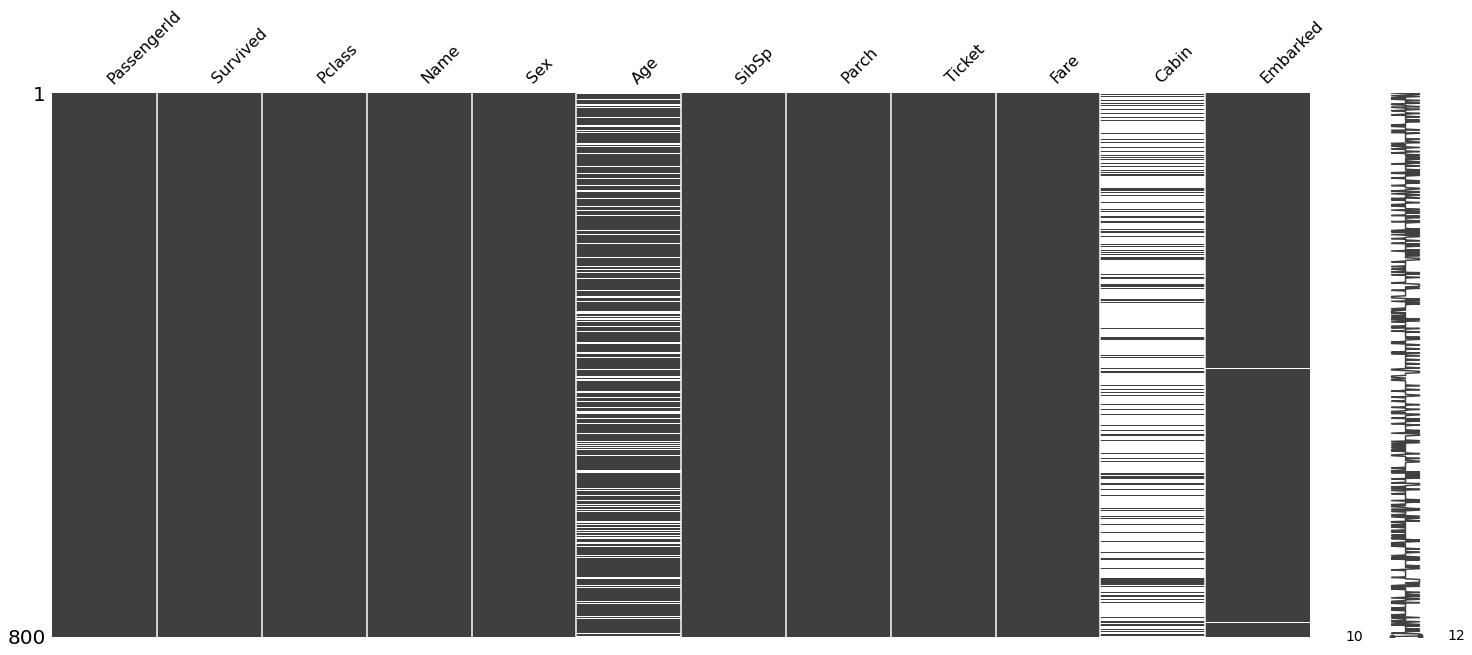

In [48]:
msno.matrix(data.sample(800))

In [49]:
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
                
        # Coumn for dtypes
        dtype = df.dtypes
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent,dtype], axis=1)
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values', 2:'Data Types'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

In [50]:
data_miss = missing_values_table(data)
data_miss

Your selected dataframe has 12 columns.
There are 3 columns that have missing values.


,Missing Values,% of Total Values,Data Types
Cabin,687,77.1,object
Age,177,19.9,float64
Embarked,2,0.2,object


<AxesSubplot:>

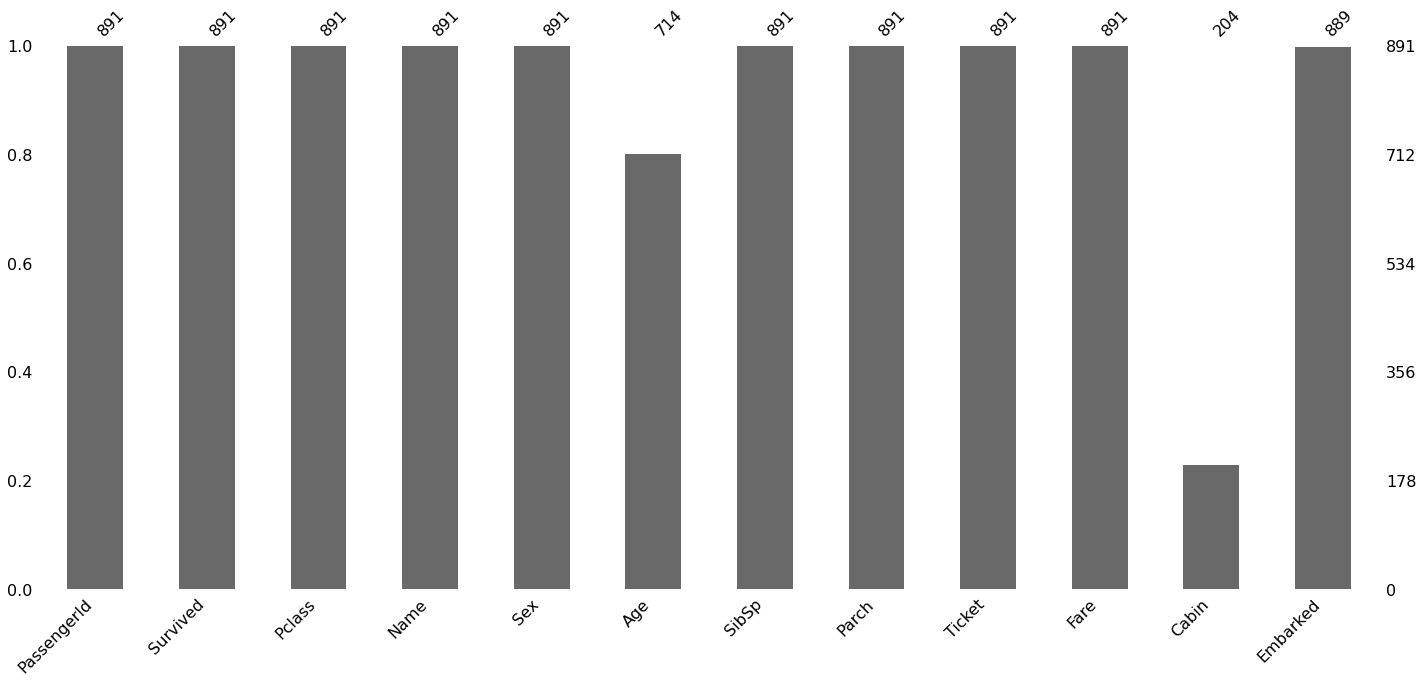

In [51]:
msno.bar(data.sample(891))

<AxesSubplot:>

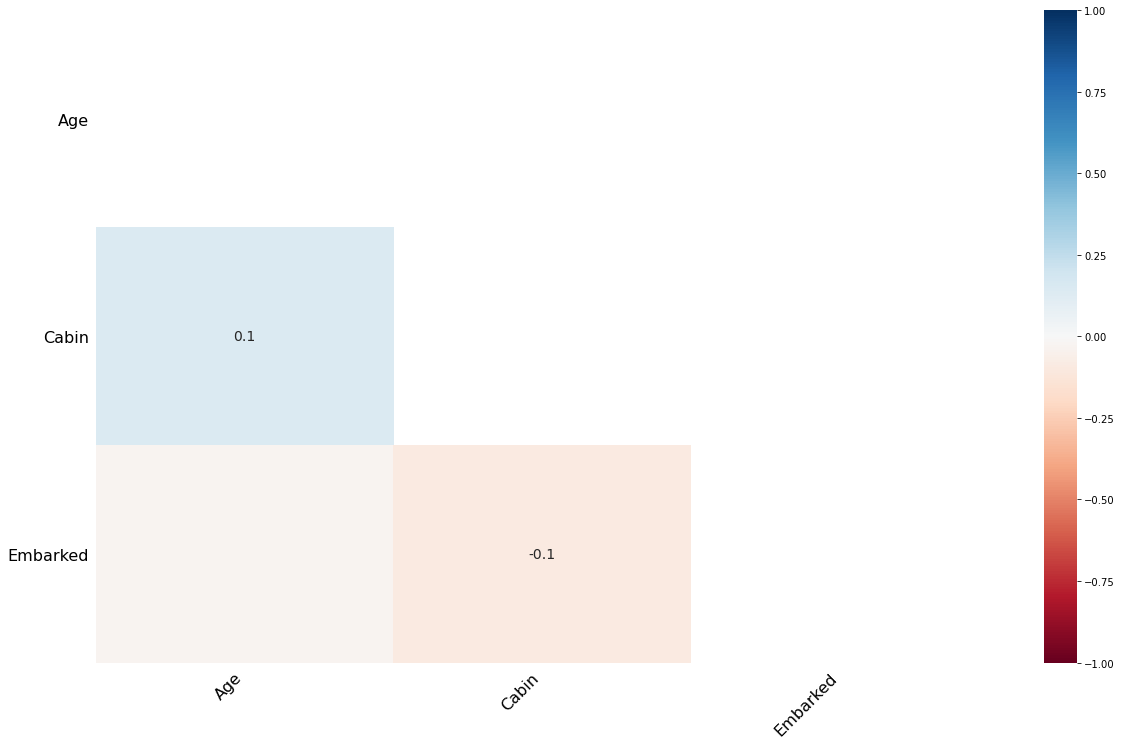

In [52]:
msno.heatmap(data)

<AxesSubplot:>

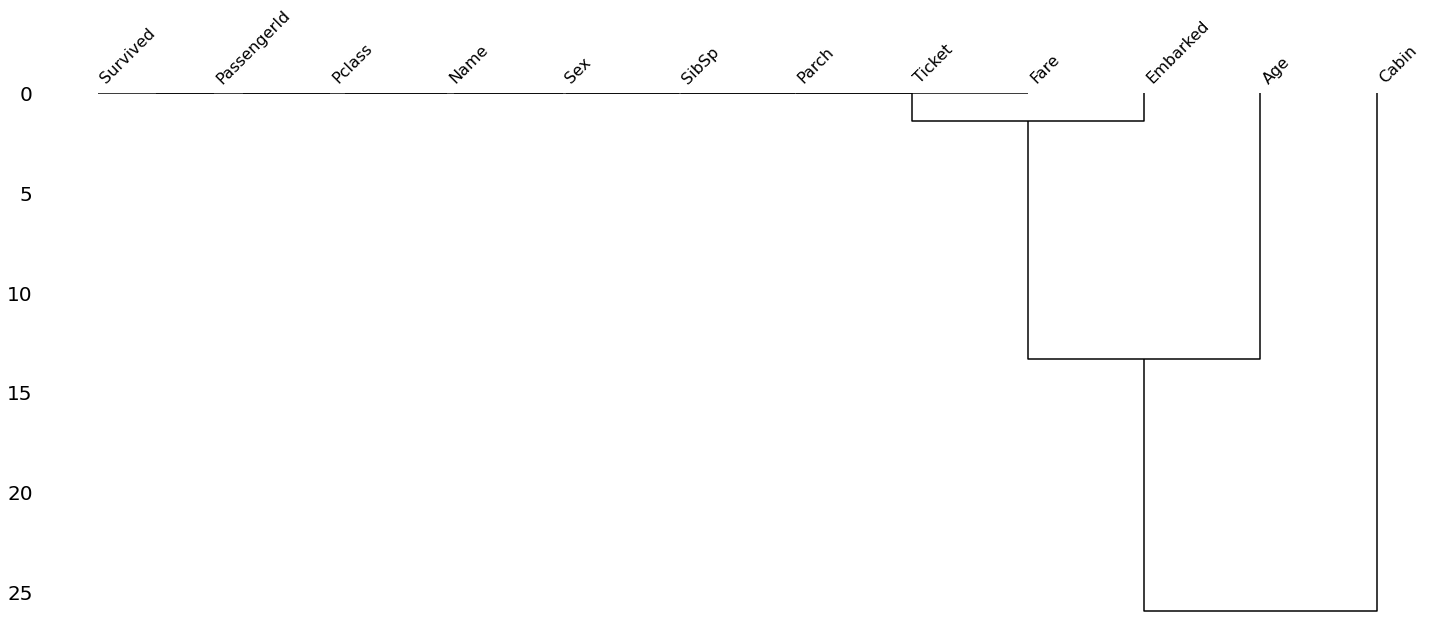

In [53]:
msno.dendrogram(data)

In [54]:
age_mean = data.Age.mean()
age_median = data.Age.median()
age_mode = data.Age.mode()
data['age_mean'] = data.Age.fillna(age_mean)
data['age_median'] = data.Age.fillna(age_median)
data['age_mode'] = data.Age.fillna(age_mode)

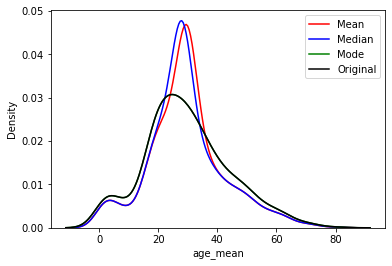

In [56]:
import seaborn as sns

sns.kdeplot(data['age_mean'],color='red',label='Mean')
sns.kdeplot(data['age_median'],color='blue',label='Median')
sns.kdeplot(data['age_mode'],color='green',label='Mode')
sns.kdeplot(data['Age'],color='black',label='Original')
plt.legend()

### Missing values for categorical features we can use

1.Delete the observations

2.Replace missing values with the most frequent value(mode)

3.Develop a model to predict missing values

4.Deleting the variable

5.Apply unsupervised Machine learning techniques: K-Means, Hierarchical clustering

### Others methods are:

1.Interpolation:‘nearest’, ‘zero’, ‘linear’, ‘quadratic’, ‘cubic’, ‘spline’, ‘barycentric’, ‘polynomial’

2.Tree based algo. can handle the category feature